## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





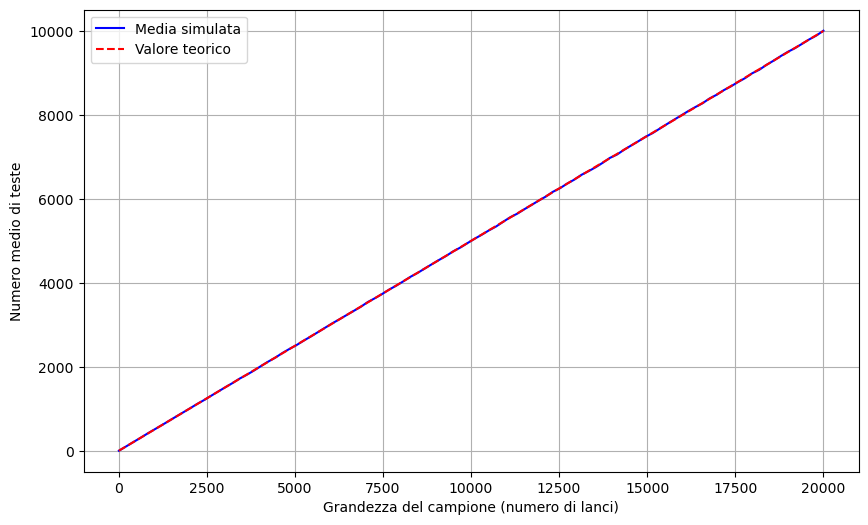

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lancio_moneta_numpy(n, num_simulazioni):
    lanci = np.random.randint(0, 2, size=(num_simulazioni, n))
    teste_per_sim = np.sum(lanci, axis=1)
    return teste_per_sim

campioni = np.linspace(10, 20000, 100, dtype=int)
num_simulazioni = 100

numero_medio_teste = []

for n in campioni:
    teste_per_simulazione = lancio_moneta_numpy(n, num_simulazioni)
    media_teste = np.mean(teste_per_simulazione)
    numero_medio_teste.append(media_teste)

plt.figure(figsize=(10, 6))
plt.plot(campioni, numero_medio_teste, color='blue', label='Media simulata')
plt.plot(campioni, campioni/2, linestyle='--', color='red', label='Valore teorico')
plt.xlabel("Grandezza del campione (numero di lanci)")
plt.ylabel("Numero medio di teste")
plt.legend()
plt.grid(True)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

Righe: 891 Colonne: 12
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Righe duplicate: 0
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


/var/folders/fn/d7sn4sn91h9_t1n_w056y8nm0000gn/T/ipykernel_49789/883152760.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


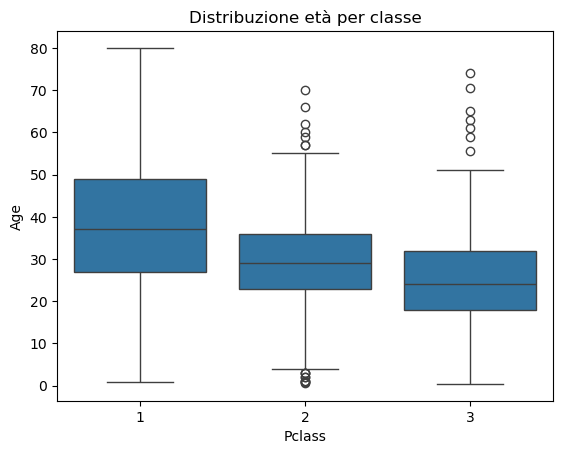

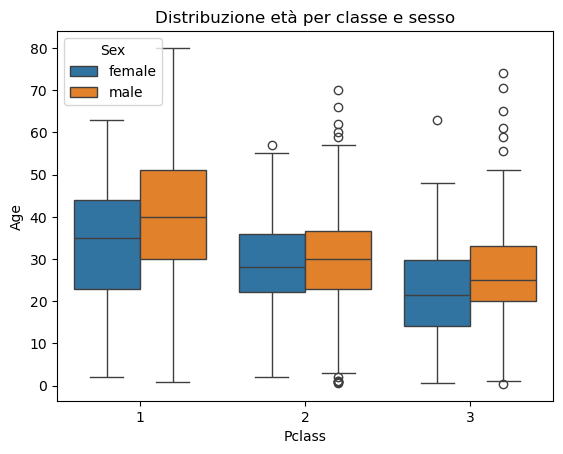

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Righe:", df.shape[0], "Colonne:", df.shape[1])

print(df.isna().sum())

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df = df.dropna(subset=['Age'])

print("Righe duplicate:", df.duplicated().sum())

eta_media_per_classe = df.groupby('Pclass')['Age'].mean()
print(eta_media_per_classe)

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Distribuzione età per classe")
plt.show()

sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title("Distribuzione età per classe e sesso")
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


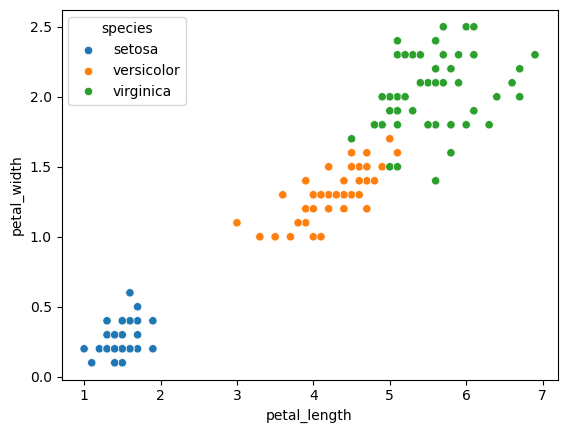

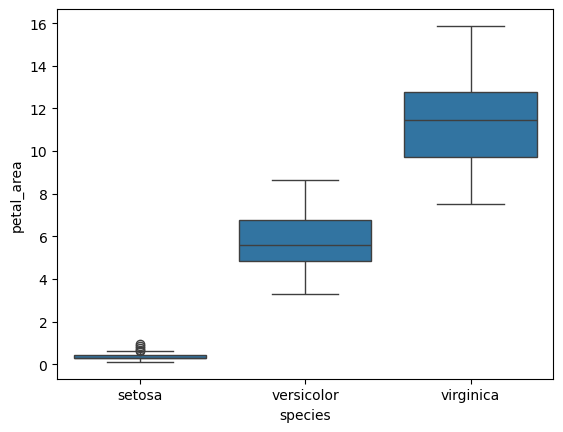

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

print(df['species'].value_counts())
print(df.groupby('species')[['petal_length', 'petal_width']].mean())

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

df['petal_area'] = df['petal_length'] * df['petal_width']
sns.boxplot(data=df, x='species', y='petal_area')
plt.show()
